In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
  import requests
  from pathlib import Path
  import os

except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
  import requests
  from pathlib import Path
  import os


Dependencies are already installed. Skipping...


In [2]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [3]:
directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

Module: modules/quantum_hardware_circuits.py already exists. Skipping...
Module: modules/experiment_utils.py already exists. Skipping...


In [4]:
from modules.experiment_utils import state_generator,ideal_qc_simulation,get_measure

In [5]:
def qfa():
  qfa_qr = QuantumRegister(4)
  qfa_template = QuantumCircuit(qfa_qr)
  qfa_template.csx(qfa_qr[1],qfa_qr[3])
  qfa_template.cx(qfa_qr[0],qfa_qr[1])
  qfa_template.csx(qfa_qr[2],qfa_qr[3])
  qfa_template.csx(qfa_qr[0],qfa_qr[3])
  qfa_template.cx(qfa_qr[1],qfa_qr[2])
  qfa_template.crx(-math.pi / 2,qfa_qr[2],qfa_qr[3])
  return qfa_template

In [6]:
def adder_4_qubits(q1,q2):
  qubits = len(q1)+len(q2) + 5
  qr = QuantumRegister(qubits)
  cr = ClassicalRegister(qubits)
  qc = QuantumCircuit(qr,cr)
  initialized_state = state_generator(q1[::-1] + q2[::-1] + "00000")
  qc.initialize(initialized_state,qr)
  qc.append(qfa(),[0,4,8,9])
  qc.append(qfa(),[1,5,9,10])
  qc.append(qfa(),[2,6,10,11])
  qc.append(qfa(),[3,7,11,12])
  return qc

In [7]:
# test quantum circuit 
a = "1001"
b = "0011"
adder_4_circuit = adder_4_qubits(a,b)

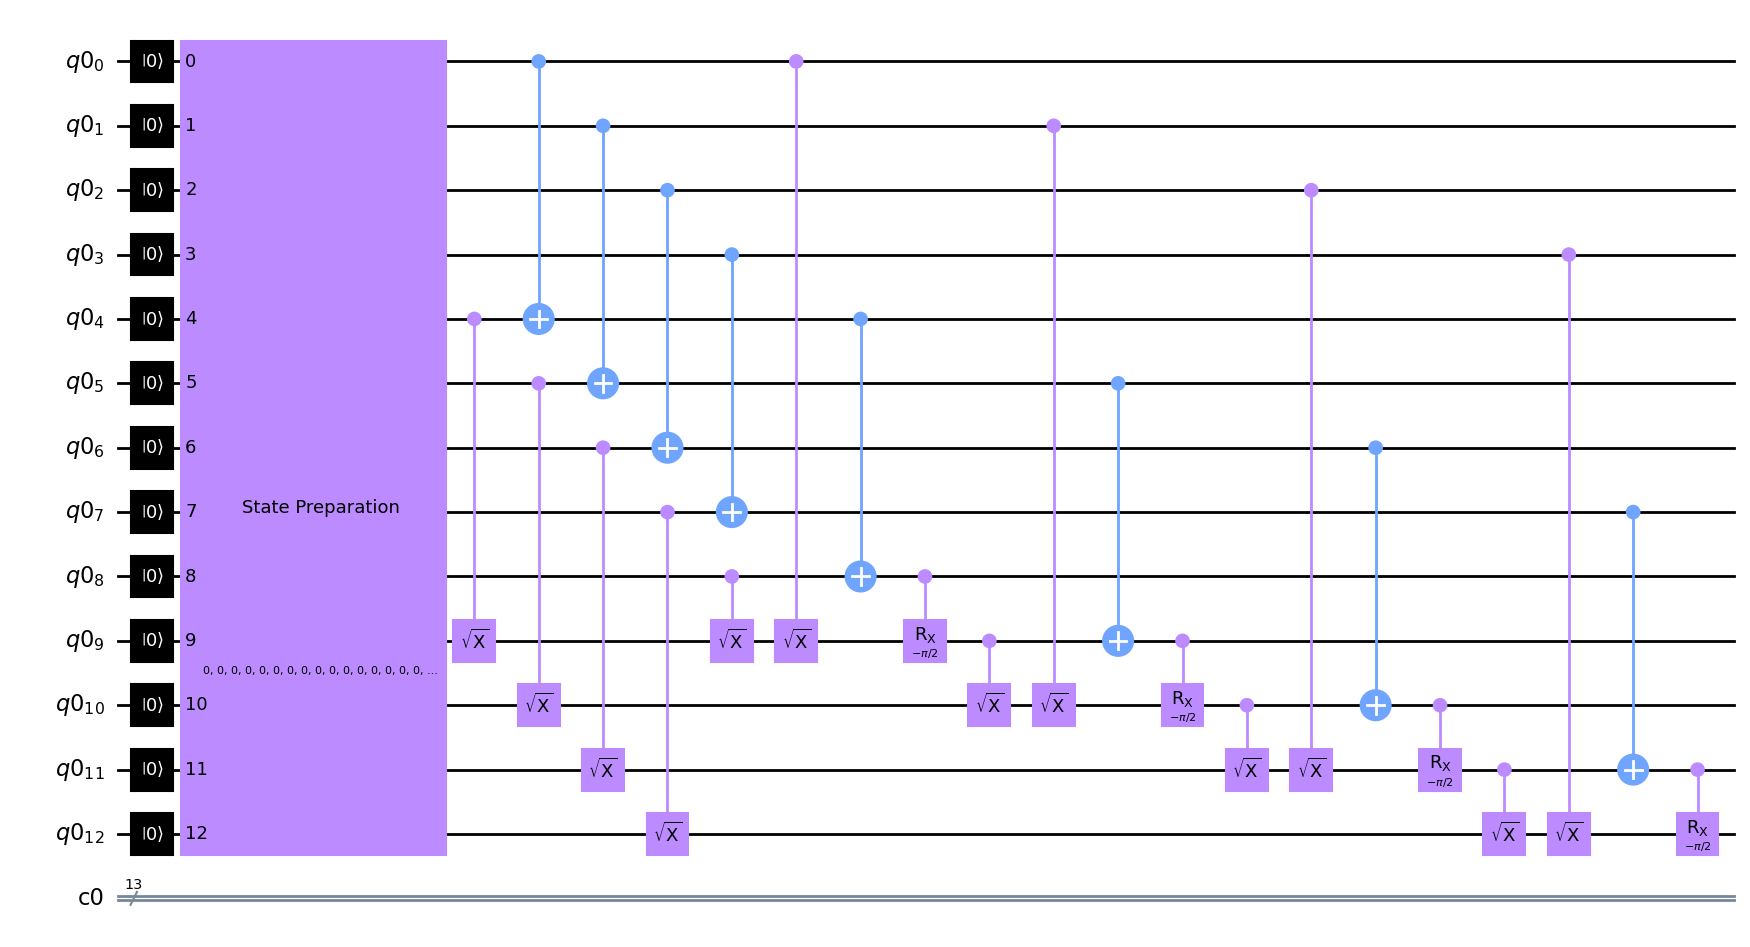

In [8]:
adder_4_circuit.decompose().draw("mpl")

In [9]:
result = ideal_qc_simulation(adder_4_circuit,backend)

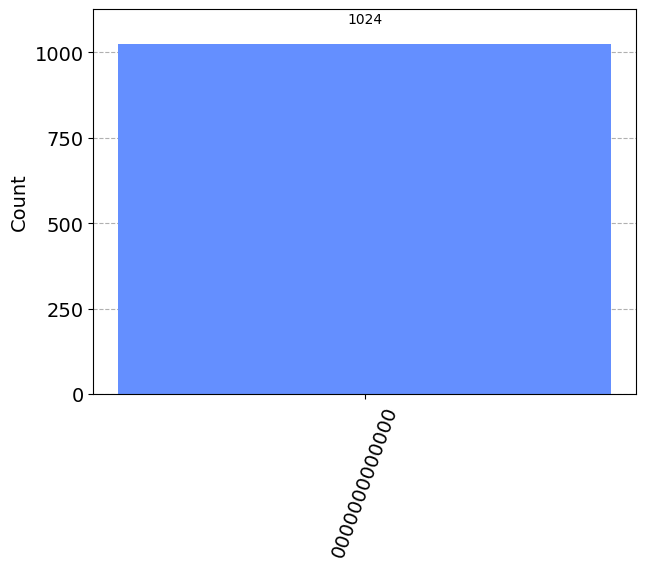

In [10]:
plot_histogram(result)

In [11]:
counts = get_measure(adder_4_circuit,1,backend)

In [12]:
counts[0][:5]

'00000'